In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import copy
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import data_challenge_library as dcl
import matplotlib as mpl
from catboost import CatBoostClassifier

In [5]:
object_table = dcl.load_table(have_images = True, features = "important")

table has 446487 sources
class
Gal         246225
Star         96715
Qso          83130
Agn           5608
highZQso      1089
Name: count, dtype: int64
Keeping 432767 labeled sources
Keeping 111453 with all important features
Keeping 111453 with available cutouts


In [18]:
train, validation, test = dcl.prepare_sample(object_table, 
                                             validation_size=0.2)

Returning train, validation and test objects


In [16]:
catb =CatBoostClassifier()
catb.fit(train.X, train.y)
prediction_catb = catb.predict(validation.X)

Learning rate set to 0.09944
0:	learn: 0.9287820	total: 55.4ms	remaining: 55.3s
1:	learn: 0.8019538	total: 97.7ms	remaining: 48.8s
2:	learn: 0.7011317	total: 135ms	remaining: 45s
3:	learn: 0.6192854	total: 174ms	remaining: 43.3s
4:	learn: 0.5511680	total: 211ms	remaining: 42s
5:	learn: 0.4948155	total: 247ms	remaining: 40.9s
6:	learn: 0.4455572	total: 284ms	remaining: 40.2s
7:	learn: 0.4033985	total: 319ms	remaining: 39.6s
8:	learn: 0.3672810	total: 355ms	remaining: 39.1s
9:	learn: 0.3351207	total: 391ms	remaining: 38.7s
10:	learn: 0.3076796	total: 426ms	remaining: 38.3s
11:	learn: 0.2827795	total: 464ms	remaining: 38.2s
12:	learn: 0.2612805	total: 500ms	remaining: 38s
13:	learn: 0.2419187	total: 537ms	remaining: 37.8s
14:	learn: 0.2247097	total: 572ms	remaining: 37.5s
15:	learn: 0.2096875	total: 608ms	remaining: 37.4s
16:	learn: 0.1958483	total: 644ms	remaining: 37.2s
17:	learn: 0.1837315	total: 679ms	remaining: 37.1s
18:	learn: 0.1725193	total: 714ms	remaining: 36.9s
19:	learn: 0.162

[0.99569749 0.97824083 0.96847721]
Using all features provided 0.9837774152619178 overall as accuracy


Text(0.5, 1.0, 'Catboost all features')

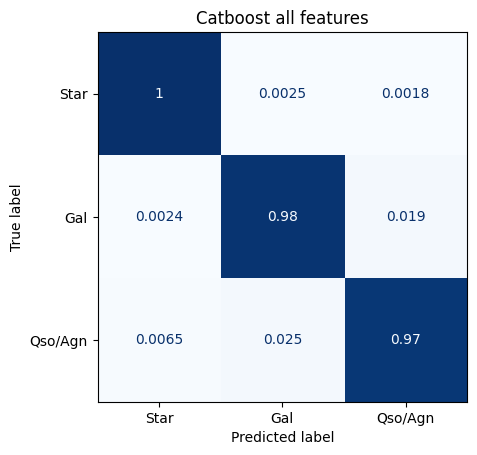

In [17]:
str_labels = ['Star', 'Gal', 'Qso/Agn']
cf = confusion_matrix(validation.y, prediction_catb, normalize="true")
accuracy = cf.diagonal()/cf.sum(axis=1)
print(accuracy)
print(f"Using all features provided {accuracy_score(validation.y, prediction_catb)} overall as accuracy")
cm_display = ConfusionMatrixDisplay(cf, display_labels=str_labels);
fig, ax = plt.subplots()
cm_display.plot(ax=ax, cmap = mpl.cm.Blues, colorbar = False)
ax.set_title("Catboost all features")

In [5]:
X_train, X_test, y_train, y_test, objectID_train, objectID_test = train_test_split(X, y, 
                                objectID, test_size = 0.5, random_state = 1406)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
display(X_train.shape, X_test.shape)


(64333, 62)

(64333, 62)

## Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
prediction_rfc = rfc.predict(X_test)

[0.99167387 0.98619971 0.96191052]
Random forest provided 0.982746024590801 overall as accuracy


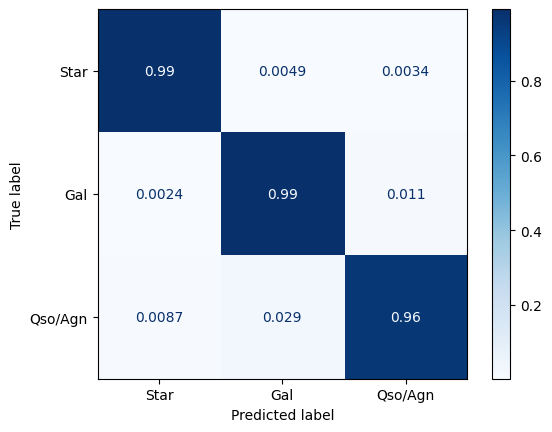

In [8]:
cf = confusion_matrix(y_test, prediction_rfc, normalize = "true")
str_labels = ['Star', 'Gal', 'Qso/Agn']
accuracy = cf.diagonal()/cf.sum(axis=1)
print(accuracy)
print(f"Random forest provided {accuracy_score(y_test, prediction_rfc)} overall as accuracy")
ConfusionMatrixDisplay(cf, display_labels=str_labels).plot(cmap=mpl.cm.Blues);

## Gradient Boosting

In [9]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.ensemble import AdaBoostClassifier

In [10]:
catb =CatBoostClassifier()
catb.fit(X_train, y_train)
prediction_catb = catb.predict(X_test)

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
prediction_abc = abc.predict(X_test)

Learning rate set to 0.097848
0:	learn: 0.9318844	total: 76.8ms	remaining: 1m 16s
1:	learn: 0.8073226	total: 95.2ms	remaining: 47.5s
2:	learn: 0.7077433	total: 113ms	remaining: 37.5s
3:	learn: 0.6268308	total: 129ms	remaining: 32s
4:	learn: 0.5598617	total: 143ms	remaining: 28.5s
5:	learn: 0.5023189	total: 157ms	remaining: 25.9s
6:	learn: 0.4535600	total: 170ms	remaining: 24.1s
7:	learn: 0.4113863	total: 183ms	remaining: 22.6s
8:	learn: 0.3748038	total: 195ms	remaining: 21.5s
9:	learn: 0.3429484	total: 208ms	remaining: 20.5s
10:	learn: 0.3153463	total: 219ms	remaining: 19.7s
11:	learn: 0.2907485	total: 232ms	remaining: 19.1s
12:	learn: 0.2688543	total: 245ms	remaining: 18.6s
13:	learn: 0.2498117	total: 256ms	remaining: 18.1s
14:	learn: 0.2321573	total: 269ms	remaining: 17.7s
15:	learn: 0.2175315	total: 281ms	remaining: 17.3s
16:	learn: 0.2038704	total: 293ms	remaining: 17s
17:	learn: 0.1916743	total: 306ms	remaining: 16.7s
18:	learn: 0.1804556	total: 319ms	remaining: 16.5s
19:	learn: 0

[0.99371613 0.98824265 0.96560527]
Catboost provided 0.985170907621283 overall as accuracy
[0.98413322 0.97273296 0.93194948]
AdaBoost provided 0.9678081233581521 overall as accuracy


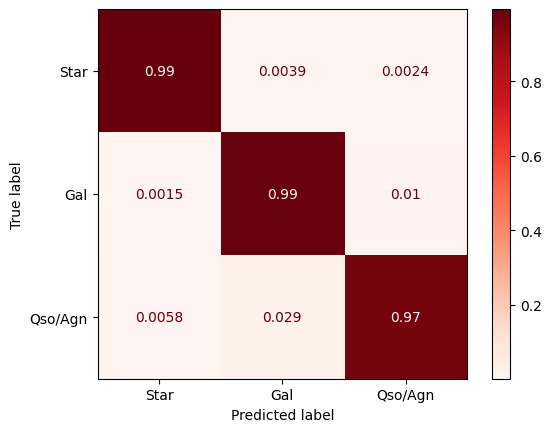

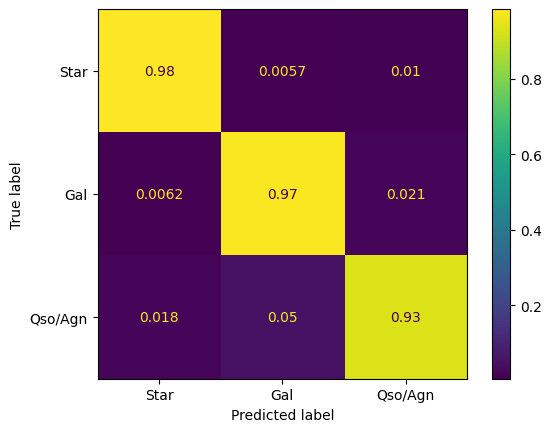

In [11]:
cf_cat = confusion_matrix(y_test, prediction_catb, normalize = "true")
cf_ada = confusion_matrix(y_test, prediction_abc, normalize = "true")
str_labels = ['Star', 'Gal', 'Qso/Agn']
accuracy_cat = cf_cat.diagonal()/cf_cat.sum(axis=1)
accuracy_ada = cf_ada.diagonal()/cf_ada.sum(axis=1)
print(accuracy_cat)
print(f"Catboost provided {accuracy_score(y_test, prediction_catb)} overall as accuracy")
print(accuracy_ada)
print(f"AdaBoost provided {accuracy_score(y_test, prediction_abc)} overall as accuracy")
ConfusionMatrixDisplay(cf_cat, display_labels=str_labels).plot(cmap=mpl.cm.Reds);
ConfusionMatrixDisplay(cf_ada, display_labels=str_labels).plot();

## Bagging (Bootstrap Aggregating)

In [16]:
from sklearn.ensemble import BaggingClassifier

In [17]:
bgc = BaggingClassifier()
bgc.fit(X_train, y_train)
prediction_bgc = bgc.predict(X_test)


[0.99175242 0.98415676 0.95216982]
Bagging provided 0.9797615531686693 overall as accuracy


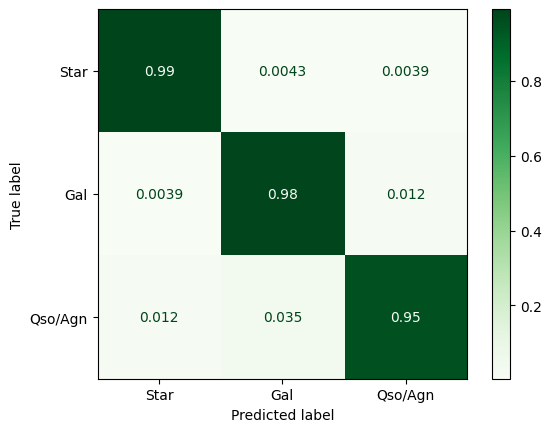

In [18]:
cf = confusion_matrix(y_test, prediction_bgc, normalize = "true")
str_labels = ['Star', 'Gal', 'Qso/Agn']
accuracy = cf.diagonal()/cf.sum(axis=1)
print(accuracy)
print(f"Bagging provided {accuracy_score(y_test, prediction_bgc)} overall as accuracy")
ConfusionMatrixDisplay(cf, display_labels=str_labels).plot(cmap=mpl.cm.Greens);

## Mixing them

In [19]:
def voting_predictions(X_test, *classifiers, weights = "equal", vote = "soft", Nclasses=3):
    
    if weights=="equal":
        weights = [1 for i in classifiers]
    else: assert(len(weights) == len(classifiers))

    weights = np.array(weights)/np.sum(weights)
    
    if vote == "hard":
        predictions = np.zeros((len(X_test), len(classifiers)), dtype=int)
        for i, classifier in enumerate(classifiers):
            predictions[:,i] = classifier.predict(X_test).flatten()
            Nvotes = np.array([np.sum(predictions==i, axis = 1) for i in range(Nclasses)]).T
            final_predictions =   np.argmax(Nvotes, axis = 1)
            
    elif vote == "soft":
        probabilities = np.zeros((len(X_test), Nclasses, len(classifiers)))
        for (i,classifier)in enumerate(classifiers):
            probabilities[:,:,i] = weights[i]*classifier.predict_proba(X_test)
        final_predictions = np.argmax(np.sum(probabilities, axis = -1), axis = 1)        
    return final_predictions

In [20]:
mixed_predictions = voting_predictions(X_test, catb, rfc, bgc,  vote = 'soft', weights = [1.,1,1])
mixed_predictions_hard = voting_predictions(X_test, catb, rfc, bgc,  vote = 'hard', weights = [1.,1,1])

[0.99336266 0.98765895 0.96479914]
All classifiers provided 0.9846268633516236 overall as accuracy


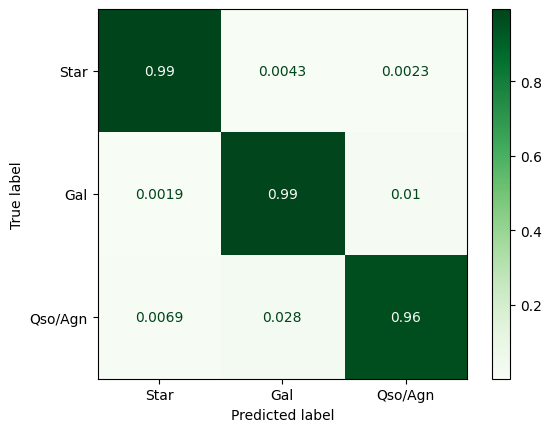

In [21]:
cf = confusion_matrix(y_test, mixed_predictions, normalize = "true")
str_labels = ['Star', 'Gal', 'Qso/Agn']
accuracy = cf.diagonal()/cf.sum(axis=1)
print(accuracy)
print(f"All classifiers provided {accuracy_score(y_test, mixed_predictions)} overall as accuracy")
ConfusionMatrixDisplay(cf, display_labels=str_labels).plot(cmap=mpl.cm.Greens);

In [14]:
false_negative_rf = (prediction_rfc != 2 ) & (y_test == 2)
print(np.sum(false_negative_rf))
false_negative_catb = (prediction_catb != 2 ).flatten() & (y_test == 2)
print(np.sum(false_negative_catb))
in_common = false_negative_catb & false_negative_rf
print(np.sum(in_common))

567
512
438


## Caruana+24
https://towardsdatascience.com/ensembles-the-almost-free-lunch-in-machine-learning-91af7ebe5090


In [15]:
def ensemble_selector(loss_function, y_hats, y_true, init_size=1,
                      replacement=True, max_iter=100):
    """Implementation of the algorithm of Caruana et al. (2004) 'Ensemble
    Selection from Libraries of Models'. Given a loss function mapping
    predicted and ground truth values to a scalar along with a dictionary of
    models with predicted and ground truth values, constructs an optimal
    ensemble minimizing ensemble loss, by default allowing models to appear
    several times in the ensemble.
    Parameters
    ----------
    loss_function: function
        accepting two arguments - numpy arrays of predictions and true values - 
        and returning a scalar
    y_hats: dict
        with keys being model names and values being numpy arrays of predicted
        values
    y_true: np.array
        numpy array of true values, same for each model
    init_size: int
        number of models in the initial ensemble, picked by the best loss.
        Default is 1
    replacement: bool
        whether the models should be returned back to the pool of models once
        added to the ensemble. Default is True
    max_iter: int
        number of iterations for selection with replacement to perform. Only
        relevant if 'replacement' is True, otherwise iterations continue until
        the dataset is exhausted i.e.
        min(len(y_hats.keys())-init_size, max_iter). Default is 100
    Returns
    -------
    ensemble_loss: pd.Series
        with loss of the ensemble over iterations
    model_weights: pd.DataFrame
        with model names across columns and ensemble selection iterations
        across rows. Each value is the weight of a model in the ensemble
    """
    # Step 1: compute losses
    losses = dict()
    for model, y_hat in y_hats.items():
        losses[model] = loss_function(y_hat, y_true)

    # Get the initial ensemble comprising the best models
    losses = pd.Series(losses).sort_values()
    init_ensemble = losses.iloc[:init_size].index.tolist()

    # Compute its loss
    if init_size == 1:
        # Take the best loss
        init_loss = losses.loc[init_ensemble].values[0]
        y_hat_avg = y_hats[init_ensemble[0]].copy()
    else:
        # Average the predictions over several models
        y_hat_avg = np.array(
            [y_hats[mod] for mod in init_ensemble]).mean(axis=0)
        init_loss = loss_function(y_hat_avg, y_true)

    # Define the set of available models
    if replacement:
        available_models = list(y_hats.keys())
    else:
        available_models = losses.index.difference(init_ensemble).tolist()
        # Redefine maximum number of iterations
        max_iter = min(len(available_models), max_iter)

    # Sift through the available models keeping track of the ensemble loss
    # Redefine variables for the clarity of exposition
    current_loss = init_loss
    current_size = init_size

    loss_progress = [current_loss]
    ensemble_members = [init_ensemble]
    for i in range(max_iter):
        # Compute weights for predictions
        w_current = current_size / (current_size + 1)
        w_new = 1 / (current_size + 1)

        # Try all models one by one
        tmp_losses = dict()
        tmp_y_avg = dict()
        for mod in available_models:
            tmp_y_avg[mod] = w_current * y_hat_avg + w_new * y_hats[mod]
            tmp_losses[mod] = loss_function(tmp_y_avg[mod], y_true)

        # Locate the best trial
        best_model = pd.Series(tmp_losses).sort_values().index[0]

        # Update the loop variables and record progress
        current_loss = tmp_losses[best_model]
        loss_progress.append(current_loss)
        y_hat_avg = tmp_y_avg[best_model]
        current_size += 1
        ensemble_members.append(ensemble_members[-1] + [best_model])

        if not replacement:
            available_models.remove(best_model)

    # Organize the output
    ensemble_loss = pd.Series(loss_progress, name="loss")
    model_weights = pd.DataFrame(index=ensemble_loss.index,
                                 columns=y_hats.keys())
    for ix, row in model_weights.iterrows():
        weights = pd.Series(ensemble_members[ix]).value_counts()
        weights = weights / weights.sum()
        model_weights.loc[ix, weights.index] = weights

    return ensemble_loss, model_weights.fillna(0).astype(float)


In [46]:
def cross_entropy(predictions, targets, epsilon=1e-8):
    """Compute cross entropy given predictions as class probabilities and one-
    hot encoded ground truth labels.
    Parameters
    ----------
    predictions: np.array
        (num examples, num_classes) of predicted class probabilities
    targets: np.array
        (num examples, num_classes) of one-hot encoded true class labels
    epsilon: float
     a constant to clip predicted probabilities to avoid taking log of zero
    Returns
    -------
    cross_entropy: float
        cross entropy of the inputs
    """
    predictions = np.clip(predictions, epsilon, 1-epsilon)
    return (-np.log(predictions) * targets).sum(axis=1).mean()


def get_accuracy(predictions, targets, one_hot_targets=True):
    """Compute accuracy given arrays of predictions and targets.

    Parameters
    predictions: np.array
        (num examples, num_classes) of predicted class probabilities/scores
    targets: np.array
        (num examples, num_classes) of one hot encoded true class labels if
        'one_hot_targets' is True, or true class indices if it is False
    one_hot_targets: bool
        whether the target are in one-hot or class index format. Default is
        True

    Returns
    -------
    accuracy: float
        accuracy of predictions

    """
    if one_hot_targets:
        return (predictions.argmax(axis=1) == targets.argmax(axis=1)).mean()
    else:
        return (predictions.argmax(axis=1) == targets).mean()


In [26]:
enc = LabelBinarizer()
enc.fit_transform(prediction_bgc)

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [27]:
enc = LabelBinarizer()
all_predictions = {
     "random_forest" :    enc.fit_transform(prediction_rfc), 
     "cataboost"    :     enc.fit_transform(prediction_catb),
     "adaboost"     :     enc.fit_transform(prediction_abc),
     "bagging"      :     enc.fit_transform(prediction_bgc)}

In [51]:
ensemble_loss, model_weights = ensemble_selector(
    loss_function= cross_entropy, 
    y_hats = all_predictions,
    y_true=enc.fit_transform(y_test), init_size=1, replacement=True, max_iter=20)

In [52]:
weighted_predictions = voting_predictions(X_test, rfc, catb, abc, bgc,  vote = 'soft', weights = model_weights.iloc[20,:].to_list())

In [53]:
print(model_weights)

    random_forest  cataboost  adaboost   bagging
0        0.000000   1.000000  0.000000  0.000000
1        0.000000   0.500000  0.500000  0.000000
2        0.000000   0.333333  0.333333  0.333333
3        0.250000   0.250000  0.250000  0.250000
4        0.200000   0.400000  0.200000  0.200000
5        0.166667   0.500000  0.166667  0.166667
6        0.142857   0.571429  0.142857  0.142857
7        0.250000   0.500000  0.125000  0.125000
8        0.222222   0.555556  0.111111  0.111111
9        0.200000   0.600000  0.100000  0.100000
10       0.181818   0.545455  0.090909  0.181818
11       0.166667   0.583333  0.083333  0.166667
12       0.230769   0.538462  0.076923  0.153846
13       0.214286   0.571429  0.071429  0.142857
14       0.200000   0.600000  0.066667  0.133333
15       0.250000   0.562500  0.062500  0.125000
16       0.235294   0.588235  0.058824  0.117647
17       0.222222   0.555556  0.055556  0.166667
18       0.210526   0.526316  0.105263  0.157895
19       0.200000   

[0.99387322 0.98832604 0.96560527]
All weighted classifiers provided 0.9852641723532246 overall as accuracy


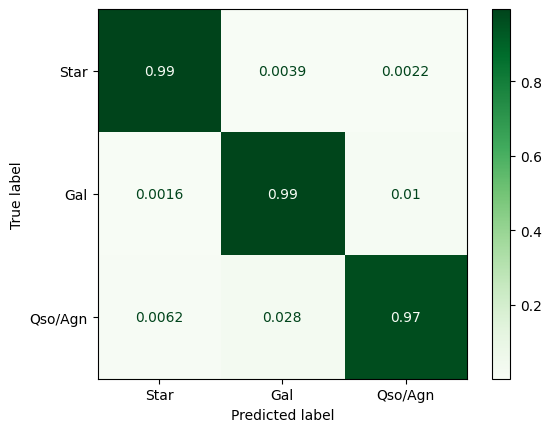

In [54]:
cf = confusion_matrix(y_test, weighted_predictions, normalize = "true")
str_labels = ['Star', 'Gal', 'Qso/Agn']
accuracy = cf.diagonal()/cf.sum(axis=1)
print(accuracy)
print(f"All weighted classifiers provided {accuracy_score(y_test, weighted_predictions)} overall as accuracy")
ConfusionMatrixDisplay(cf, display_labels=str_labels).plot(cmap=mpl.cm.Greens);

In [55]:
X_validation = validation_table.drop(columns=["class", "label"])
y_validation = validation_table["label"].to_numpy().astype('int32')
X_validation = scaler.transform(X_validation)


In [57]:
val_weighted_predictions = voting_predictions(X_validation, rfc, catb, abc, bgc,  vote = 'soft', weights = model_weights.iloc[20,:].to_list())
val_rfc_predictions = rfc.predict(X_validation)
val_catb_predictions = catb.predict(X_validation)
val_abc_predictions = abc.predict(X_validation)
val_bgc_predictions = bgc.predict(X_validation)

In [60]:
accuracies = []
#f1_scores = []

for predictions in [val_rfc_predictions, val_catb_predictions , val_abc_predictions, val_bgc_predictions, val_weighted_predictions]:
    accuracies.append(accuracy_score(y_validation, predictions))

NameError: name 'predictions' is not defined

array([[0],
       [2],
       [1],
       ...,
       [2],
       [1],
       [0]])